<a href="https://www.kaggle.com/code/tiodaronzi3/car-price-prediction-by-lr-dt-and-rf?scriptVersionId=92298058" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Car Price Prediction by LR, DT and RF
---
Github: [Car Price Prediction by LR, DT and RF](https://github.com/bassamfaramawi/car-price-pridiction)

Kaggle: [Car Price Prediction by LR, DT and RF](https://www.kaggle.com/code/tiodaronzi3/car-price-prediction-by-lr-dt-and-rf)

Aouther: Bassam Faramawi

---


**Contents**
* [Introduction](#Introduction)
* [Packages](#Packages)
* [Data Wrangling](#Data_Wrangling)
    * [Explore data](#Explore_data)
    * [Visualize data](#Visualize_data)
* [Machine Learning Process](#Machine_Learning_Process)
   * [Split test Set](#Split_test_set)
   * [Prepare train data](#Prepare_train_data)
   * [Select&train a model](#Select&train_a_model)
   * [Model tuning](#Model_tuning)
   * [Evaluate model on test set](#Evaluate_model_on_test_set)


<a id='Introduction'></a> <br>
# Introduction

> In this notebook I work to model US car prices with the available independent variables to help the management of Chinese automobile company "Geely Auto" who aspires to enter the US market to understand how exactly the prices vary with the independent variables.They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


> The dataset contains price information about magority of car models in US from Kaggle datasets __[here](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/)__, and is provided for learning purpose. Please don’t draw any inference with real world scenario. The dataset consist of 2 files:
> > -  The core data contains price information about car models.
> > -  Data dictionary that explains data features 

<a id='Packages'></a> <br>
# Packages


In [1]:
# First, we import few required python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

<a id='Data_Wrangling'></a> <br>
# Data Wrangling

<a id='Explore_data'></a> <br>
 ### Explore data

In [2]:
carPrice = pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')

In [3]:
carPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Some heddin columns, lets display:**

In [4]:
pd.options.display.max_columns = None
carPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**The dataset has 205 car models each has 26 attributes (25 features + 1 label (price)).**

**There is no null values, Let's take a closer look:**

In [6]:
carPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<a id='Visualize_data'></a> <br>
 ### Visualize data
> The distribution of numeric attributes:

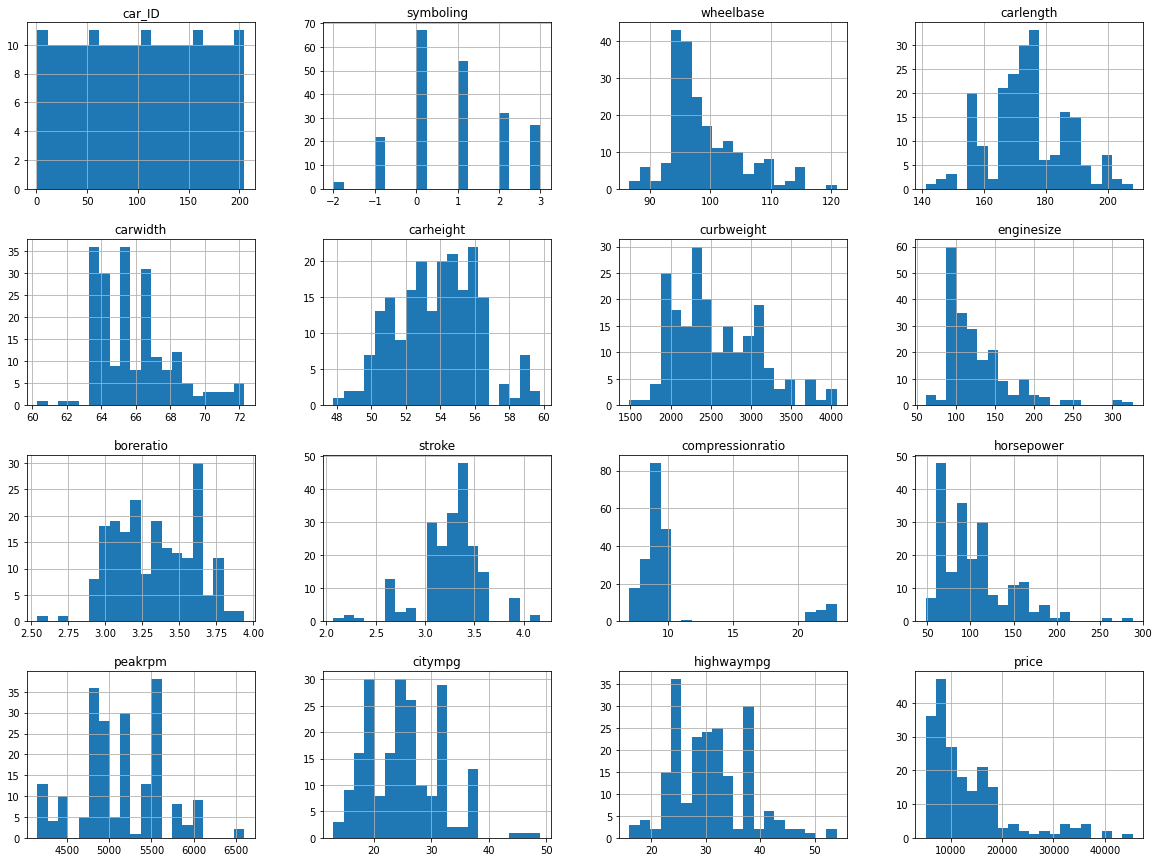

In [7]:
%matplotlib inline
carPrice.hist(bins=20, figsize=(20,15))
plt.show()

**Note that all numeric attributes are normal distributed except 'wheelbase', 'enginesize', 'compressionratio' and 'price' are right skewed which may cuase some effect on model training, so rescaling will be needed next.** 



In [8]:
corr_matrix = carPrice.corr()
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

**Now is a clear that price is most correlated with 'enginesize', 'curbweight' and 'horsepower' positively.**

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='enginesize', ylabel='price'>,
        <AxesSubplot:xlabel='curbweight', ylabel='price'>,
        <AxesSubplot:xlabel='horsepower', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='enginesize'>,
        <AxesSubplot:xlabel='enginesize', ylabel='enginesize'>,
        <AxesSubplot:xlabel='curbweight', ylabel='enginesize'>,
        <AxesSubplot:xlabel='horsepower', ylabel='enginesize'>],
       [<AxesSubplot:xlabel='price', ylabel='curbweight'>,
        <AxesSubplot:xlabel='enginesize', ylabel='curbweight'>,
        <AxesSubplot:xlabel='curbweight', ylabel='curbweight'>,
        <AxesSubplot:xlabel='horsepower', ylabel='curbweight'>],
       [<AxesSubplot:xlabel='price', ylabel='horsepower'>,
        <AxesSubplot:xlabel='enginesize', ylabel='horsepower'>,
        <AxesSubplot:xlabel='curbweight', ylabel='horsepower'>,
        <AxesSubplot:xlabel='horsepower', ylabel='horsepower'>]],
      dtype

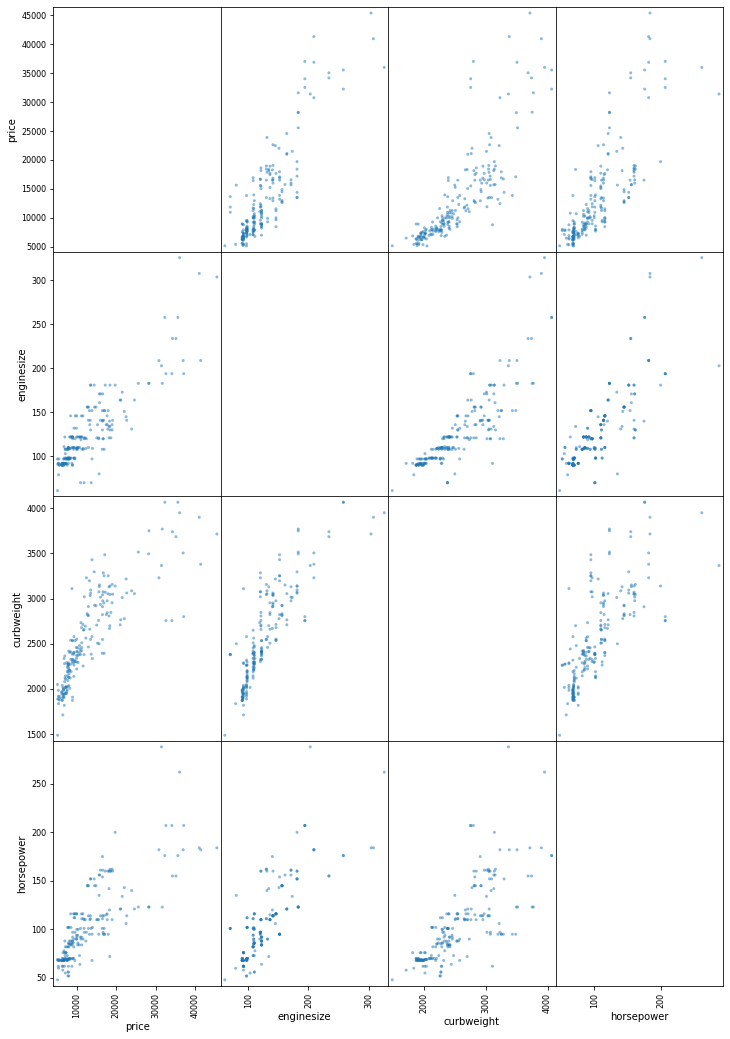

In [9]:
attributes = ["price", "enginesize", "curbweight", "horsepower"]
scatter_matrix(carPrice[attributes], figsize=(12,18), diagonal='scatter')

<AxesSubplot:xlabel='price', ylabel='enginesize'>

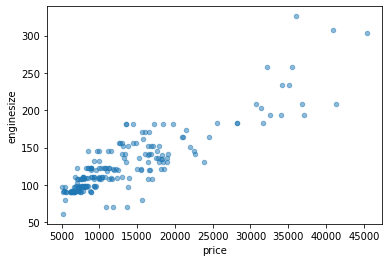

In [10]:
carPrice.plot(kind="scatter", x="price", y="enginesize",
alpha=0.5)


<a id='Machine Learning Process'></a> <br>
# Machine Learning Process

<a id='Split_test_set'></a> <br>
### Split test set

> Before splitting train/test sets, need to be sure that test set will be representative of the overall 'enginsize' through stratified sampling as it the most feature corellated with 'price' label.

<AxesSubplot:>

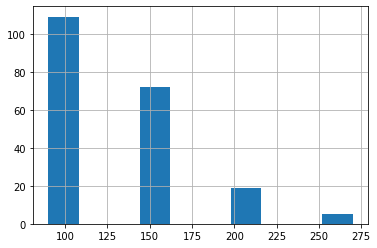

In [11]:
carPrice["enginesize_cat"] = pd.cut(carPrice["enginesize"], 
                                    bins=[0., 60, 120, 180, 240., np.inf], 
                                    labels=[30, 90, 150, 210, 270])
carPrice["enginesize_cat"].hist()

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(carPrice, carPrice["enginesize_cat"]):
    strat_train_set = carPrice.loc[train_index]
    strat_test_set = carPrice.loc[test_index]

**Let’s check if this worked as expected:**

In [13]:
strat_test_set["enginesize_cat"].value_counts() / len(strat_test_set)

90     0.536585
150    0.341463
210    0.097561
270    0.024390
30     0.000000
Name: enginesize_cat, dtype: float64

In [14]:
carPrice["enginesize_cat"].value_counts() / len(carPrice)

90     0.531707
150    0.351220
210    0.092683
270    0.024390
30     0.000000
Name: enginesize_cat, dtype: float64

*Ok, that's cool.*

In [15]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("enginesize_cat", axis=1, inplace=True)

In [16]:
carPrice = strat_train_set.drop("price", axis=1)
carPrice_labels = strat_train_set["price"].copy()

<a id='Prepare_train_data'></a> <br>
### Prepare train data

In [17]:
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 1 to 130
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            164 non-null    int64  
 1   symboling         164 non-null    int64  
 2   CarName           164 non-null    object 
 3   fueltype          164 non-null    object 
 4   aspiration        164 non-null    object 
 5   doornumber        164 non-null    object 
 6   carbody           164 non-null    object 
 7   drivewheel        164 non-null    object 
 8   enginelocation    164 non-null    object 
 9   wheelbase         164 non-null    float64
 10  carlength         164 non-null    float64
 11  carwidth          164 non-null    float64
 12  carheight         164 non-null    float64
 13  curbweight        164 non-null    int64  
 14  enginetype        164 non-null    object 
 15  cylindernumber    164 non-null    object 
 16  enginesize        164 non-null    int64  
 1

**The train set consist of 9 categorical features will be encoded and 10 numeric features will be rescaled.**

In [18]:
cat_colums = ['fueltype','aspiration', 'doornumber', 'carbody', 'drivewheel', 
              'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

num_colums = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
              'boreratio', 'compressionratio', 'horsepower', 'peakrpm', 
              'citympg']

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

pipline = ColumnTransformer([('num', StandardScaler(), num_colums),
                             ('cat', one_hot_encoder, cat_colums)])
pipline.fit(carPrice)

cat_encoder = pipline.named_transformers_['cat']
features = num_colums + list(cat_encoder.categories_)
    
carPrice_prepared = pipline.transform(carPrice)

<a id='Select&train_a_model'></a> <br>
### Select&train a model

> Let's try linear regressor

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(carPrice_prepared, carPrice_labels)

LinearRegression()

In [20]:
carPrice_predictions = lin_reg.predict(carPrice_prepared)
lin_mse = mean_squared_error(carPrice_labels, carPrice_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2156.646798214508

> Decision tree regressor

In [21]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(carPrice_prepared, carPrice_labels)

DecisionTreeRegressor()

In [22]:
carPrice_predictions = tree_reg.predict(carPrice_prepared)
tree_mse = mean_squared_error(carPrice_labels, carPrice_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

241.03381252531315

Very small root_mean_squere_error, may be the decision tree model badly overfitt the data, let's cross validate and see:

In [23]:
tree_scores = cross_val_score(tree_reg, carPrice_prepared, carPrice_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [3141.89478238 4478.70893293 2313.08775361 1597.62276063 3836.11727736
 5294.62050694 3016.31246568 2378.43832827 5675.5373658  3918.84115723]
Mean:  3565.118133082281
Standard deviation:  1257.1948615324288


Yes the model overfitt data, cross validate linear regresoor:

In [24]:
lin_scores = cross_val_score(lin_reg, carPrice_prepared, carPrice_labels, 
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [3279.05246204 3003.60057811 2485.6686913  2678.95091345 5912.65647016
 5660.87302341 2414.08835722 2096.6082871  3079.04094217 4553.05215239]
Mean:  3516.359187734854
Standard deviation:  1300.7945572901617


> **Random forest regressor:**

In [25]:
forest_reg = RandomForestRegressor()
forest_reg.fit(carPrice_prepared, carPrice_labels)
scores = cross_val_score(forest_reg, carPrice_prepared, carPrice_labels, 
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores:  [3162.37960458 2383.35258798 1677.42012331 1546.74486756 1994.14568205
 3322.89133031 2301.74554369 1793.19020442 2570.48868    4442.64560016]
Mean:  2519.5004224058775
Standard deviation:  853.5014895431758


**Random forest regressor is the best selected model, let's tune.**

<a id='Model_tuning'></a> <br>
### Model tunning

In [26]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(carPrice_prepared, carPrice_labels)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
    print(np.sqrt(-mean_score), params)

3982.8752318880456 {'max_features': 2, 'n_estimators': 3}
3364.911720339887 {'max_features': 2, 'n_estimators': 10}
3534.7383570024663 {'max_features': 2, 'n_estimators': 30}
3906.8823904174706 {'max_features': 4, 'n_estimators': 3}
3006.6913584449203 {'max_features': 4, 'n_estimators': 10}
2958.9968288051386 {'max_features': 4, 'n_estimators': 30}
3160.1134155780155 {'max_features': 6, 'n_estimators': 3}
3069.0855563786217 {'max_features': 6, 'n_estimators': 10}
2769.9808076405684 {'max_features': 6, 'n_estimators': 30}
3481.2452694156173 {'max_features': 8, 'n_estimators': 3}
3021.290924386835 {'max_features': 8, 'n_estimators': 10}
3009.2991730782414 {'max_features': 8, 'n_estimators': 30}
3101.7443144088097 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3155.385887708545 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3608.1400114273392 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3179.7098098916895 {'bootstrap': False, 'max_features': 3, 'n_es

In [27]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [28]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [29]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.66621902e-02, 6.07217171e-02, 6.53642807e-02, 1.61687609e-02,
       6.34605468e-02, 5.45188977e-02, 3.47869317e-02, 1.50027570e-01,
       8.19719101e-03, 1.19053372e-01, 1.88839216e-03, 3.28766338e-04,
       7.57378135e-03, 2.58865920e-03, 2.63489353e-03, 4.74516344e-03,
       7.65154747e-03, 7.49402300e-04, 5.12801638e-03, 2.17154681e-03,
       1.92348792e-03, 1.87035316e-03, 5.81249942e-02, 4.69466491e-02,
       1.35053842e-02, 1.55590660e-02, 3.84597398e-04, 0.00000000e+00,
       3.19077158e-03, 3.58828247e-03, 2.06794785e-03, 1.00129862e-02,
       3.52718716e-04, 2.14676365e-02, 4.90338055e-03, 7.40308781e-02,
       1.64523126e-02, 1.31657621e-04, 3.93843991e-03, 0.00000000e+00,
       1.57348559e-03, 3.67344464e-02, 1.66245619e-04, 1.60164389e-03,
       5.88998303e-05, 1.68789404e-02, 1.13167469e-04])

**'horsepower' feature is the most important in prediction of price.**

<a id='Evaluate_model_on_test_set'></a> <br>
### Evaluate model on test set


In [30]:
final_model = grid_search.best_estimator_
x_test = strat_test_set.drop('price', axis=1)
y_test = strat_test_set['price'].copy()

x_test_prepared = pipline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2411.4551917970634